<a href='https://www.hexnbit.com/'> <img src='hexnbit.png'/> </a>

# Linear Regression Problem

In this problem, we have a dataset, which contains several parameters which affect the prices of house.. <br>
We have to use the data in order to train our Machine Learning Model and predict the prices of the house based on the learnings of the model

### Importing required libraries and modules for now

In [1]:
from sklearn.model_selection import train_test_split  # will be used to split our dataset into training data and testing data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns            # another data visualization package based on matplotlib

### Reading Data from File

In [3]:
df=pd.read_csv("USA_Housing.csv")    # reading csv file containing data

In [4]:
df.head()     # printing head (top 5 rows) of data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()        # some stats of data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Checking corelations using heatmap

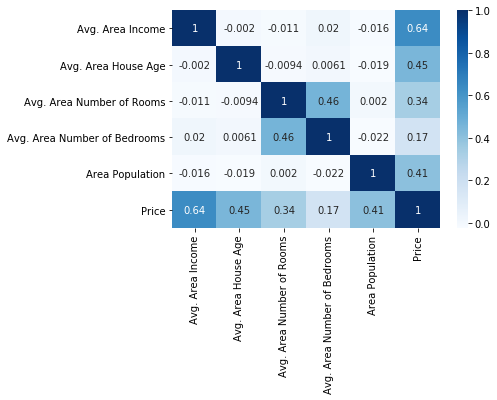

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")   # heatmap of corelation
# this can be used to drop or include data columns for training

In [8]:
df.columns   # printing the columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Preparing DataSet for Inputs and Outputs

In [9]:
# excluding address from the data as it is of text type
# excluding price from the data as it will be used as label and is dependant variable
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [10]:
# preparing label
Y=df["Price"]

### Splitting Data for Training

In [11]:
'''
X_train is data for training
X_test is data for testing
Y_train are labels for training
Y_test are labels for teting with which we will compare our predictions
split happens randomly, so the random state has been fixed so that we get exactly same model whenever
we run this code, this parameter can be changed or even excluded
Splitting Data such that 30% of data is test data and 70% is training data
'''

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Importing Linear Regression Model from SKLearn

In [12]:
# as linear regression falls into linear model family
from sklearn.linear_model import LinearRegression

In [13]:
# initializing estimator
lm=LinearRegression(fit_intercept=True)

### Training Data

In [15]:
# using fit function to train model using training data and labels
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lm.intercept_)   # intercept of regression line

-2641372.667301384


In [16]:
# printing coefficients
print(lm.coef_)

[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [18]:
# printing the columns of the traning data
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [19]:
# creating new data frame which will show that upon the change of one unit of each parameter, what will
# be the change on house price... this is done using coefficients
coef=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [20]:
coef

,Coeff
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of \$21.617635
- Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of \$165221.119872
- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of \$121405.376596
- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedroom is associated with an increase of \$1318.718783
- Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of \$15.225196 

### Getting Predictions

In [21]:
# Predicting by running model on Test Data
predictions=lm.predict(X_test)

In [22]:
# actual vs. predicted can be observed
(pd.DataFrame({"Actual":y_test,"Predicted":predictions}).reset_index())

,index,Actual,Predicted
0,1718,1.251689e+06,1.258935e+06
1,2511,8.730483e+05,8.226946e+05
2,345,1.696978e+06,1.742214e+06
3,2521,1.063964e+06,9.729370e+05
4,54,9.487883e+05,9.945460e+05
...,...,...,...
1495,3412,7.043759e+05,7.555650e+05
1496,4020,1.254938e+06,1.168110e+06
1497,4635,1.434324e+06,1.452641e+06
1498,1700,5.340775e+05,6.457971e+05


### Scatter Plot

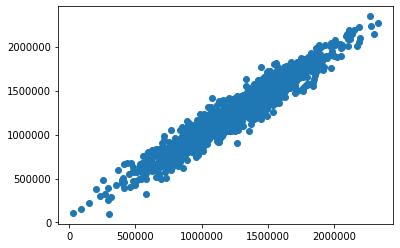

In [23]:
plt.scatter(y_test,predictions)            # plotting actual values vs. predicted values in the form of scatter
#plt.plot()

### Metrics Evaluation

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [24]:
# Metrics as discussed for Linear Regression

from sklearn import metrics            # importing metrics

R_2=metrics.r2_score(y_test,predictions)  # calculating R square Score

print("R^2",R_2)
print("MAE",metrics.mean_absolute_error(y_test,predictions))
print("MSE",metrics.mean_squared_error(y_test,predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

R^2 0.9185060945363624
MAE 81257.55795855931
MSE 10169125565.897573
RMSE 100842.08231635032


### Resetting Test Data Index as it was picked up from random indexes

In [23]:
sorted_test_data=y_test.reset_index()
sorted_test_data

,index,Price
0,1718,1.251689e+06
1,2511,8.730483e+05
2,345,1.696978e+06
3,2521,1.063964e+06
4,54,9.487883e+05
...,...,...
1495,3412,7.043759e+05
1496,4020,1.254938e+06
1497,4635,1.434324e+06
1498,1700,5.340775e+05


### Plotting Predicted Prices vs. Actual Prices for Test Data

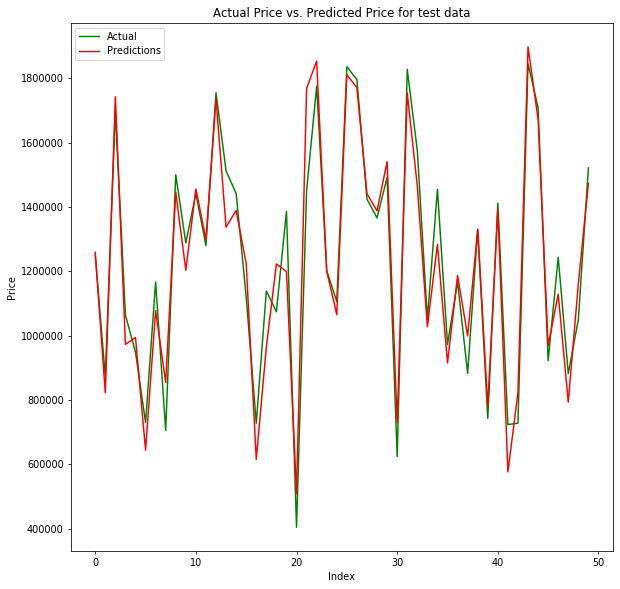

In [24]:
plt.subplots(figsize=(10,10),dpi=70)
plt.plot(sorted_test_data["Price"][0:50],"g",label="Actual")    # plotting only first 50 data points for sake of clarity
plt.plot(predictions[0:50],"r",label="Predictions")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual Price vs. Predicted Price for test data")
plt.legend()

In [ ]:
# the predicted and actual values are pretty close, which mean that the model is good